In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
np.random.seed(42)

In [5]:
tfms = get_transforms(do_flip=True,flip_vert=False,max_rotate=10.0,max_zoom=1.2,max_lighting=0.5,max_warp=0.2,p_affine=0.75,p_lighting=0.75)


In [6]:
mixup=0.2

In [7]:
loss_func = LabelSmoothingCrossEntropy()

In [8]:
# class FocalLoss(nn.Module):
#     def __init__(self, alpha=1., gamma=1.):
#         super().__init__()
#         self.alpha = alpha
#         self.gamma = gamma

#     def forward(self, inputs, targets, **kwargs):
#         CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
#         pt = torch.exp(-CE_loss)
#         F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
#         return F_loss.mean()
# loss_func = FocalLoss(gamma=2.)

In [9]:
alpha=0.99
mom=0.9
eps=1e-6

In [10]:
opt_func = partial(optim.Adam, betas=(mom,alpha), eps=eps)

In [11]:
src = (ImageList.from_folder(path='train').split_by_rand_pct(0.2).label_from_folder())

In [12]:
# from pathlib import Path
# path = Path("round1/")

# print(path)
# verify_images(path, delete=True)

In [13]:
src.add_test_folder('/home/ubuntu/snakes_breed/round1')

LabelLists;

Train: LabelList (65934 items)
x: ImageList
Image (3, 375, 500),Image (3, 500, 375),Image (3, 352, 500),Image (3, 800, 440),Image (3, 500, 281)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 375, 500),Image (3, 500, 371),Image (3, 375, 500),Image (3, 500, 375),Image (3, 375, 500)
y: CategoryList
class-540,class-526,class-771,class-4,class-804
Path: train;

Test: LabelList (17687 items)
x: ImageList
Image (3, 500, 375),Image (3, 333, 500),Image (3, 600, 800),Image (3, 1125, 2000),Image (3, 2000, 1500)
y: EmptyLabelList
,,,,
Path: train

In [14]:
data = src.transform(tfms,size=(640)).databunch(bs=60).normalize()

In [15]:
data.test_ds.items[0]

PosixPath('/home/ubuntu/snakes_breed/round1/9afc84f7f000f0cfa2d7d7b7032e4362.jpg')

In [16]:
learn = cnn_learner(data, models.densenet121,pretrained=False, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')],loss_func = loss_func,opt_func=opt_func,wd=1e-2)

/home/ubuntu/anaconda3/envs/snakes_breed/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [17]:
learn= learn.mixup(alpha=mixup)

In [18]:
learn.bn_wd=False

In [19]:
learn.true_wd=True

In [20]:
learn.load('exp-11-round-1')

Learner(data=ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 640, 640),Image (3, 640, 640),Image (3, 640, 640),Image (3, 640, 640),Image (3, 640, 640)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 640, 640),Image (3, 640, 640),Image (3, 640, 640),Image (3, 640, 640),Image (3, 640, 640)
y: CategoryList
class-540,class-526,class-771,class-4,class-804
Path: train;

Test: LabelList (17687 items)
x: ImageList
Image (3, 640, 640),Image (3, 640, 640),Image (3, 640, 640),Image (3, 640, 640),Image (3, 640, 640)
y: EmptyLabelList
,,,,
Path: train, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1

In [21]:
interp = ClassificationInterpretation.from_learner(learn)


In [22]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

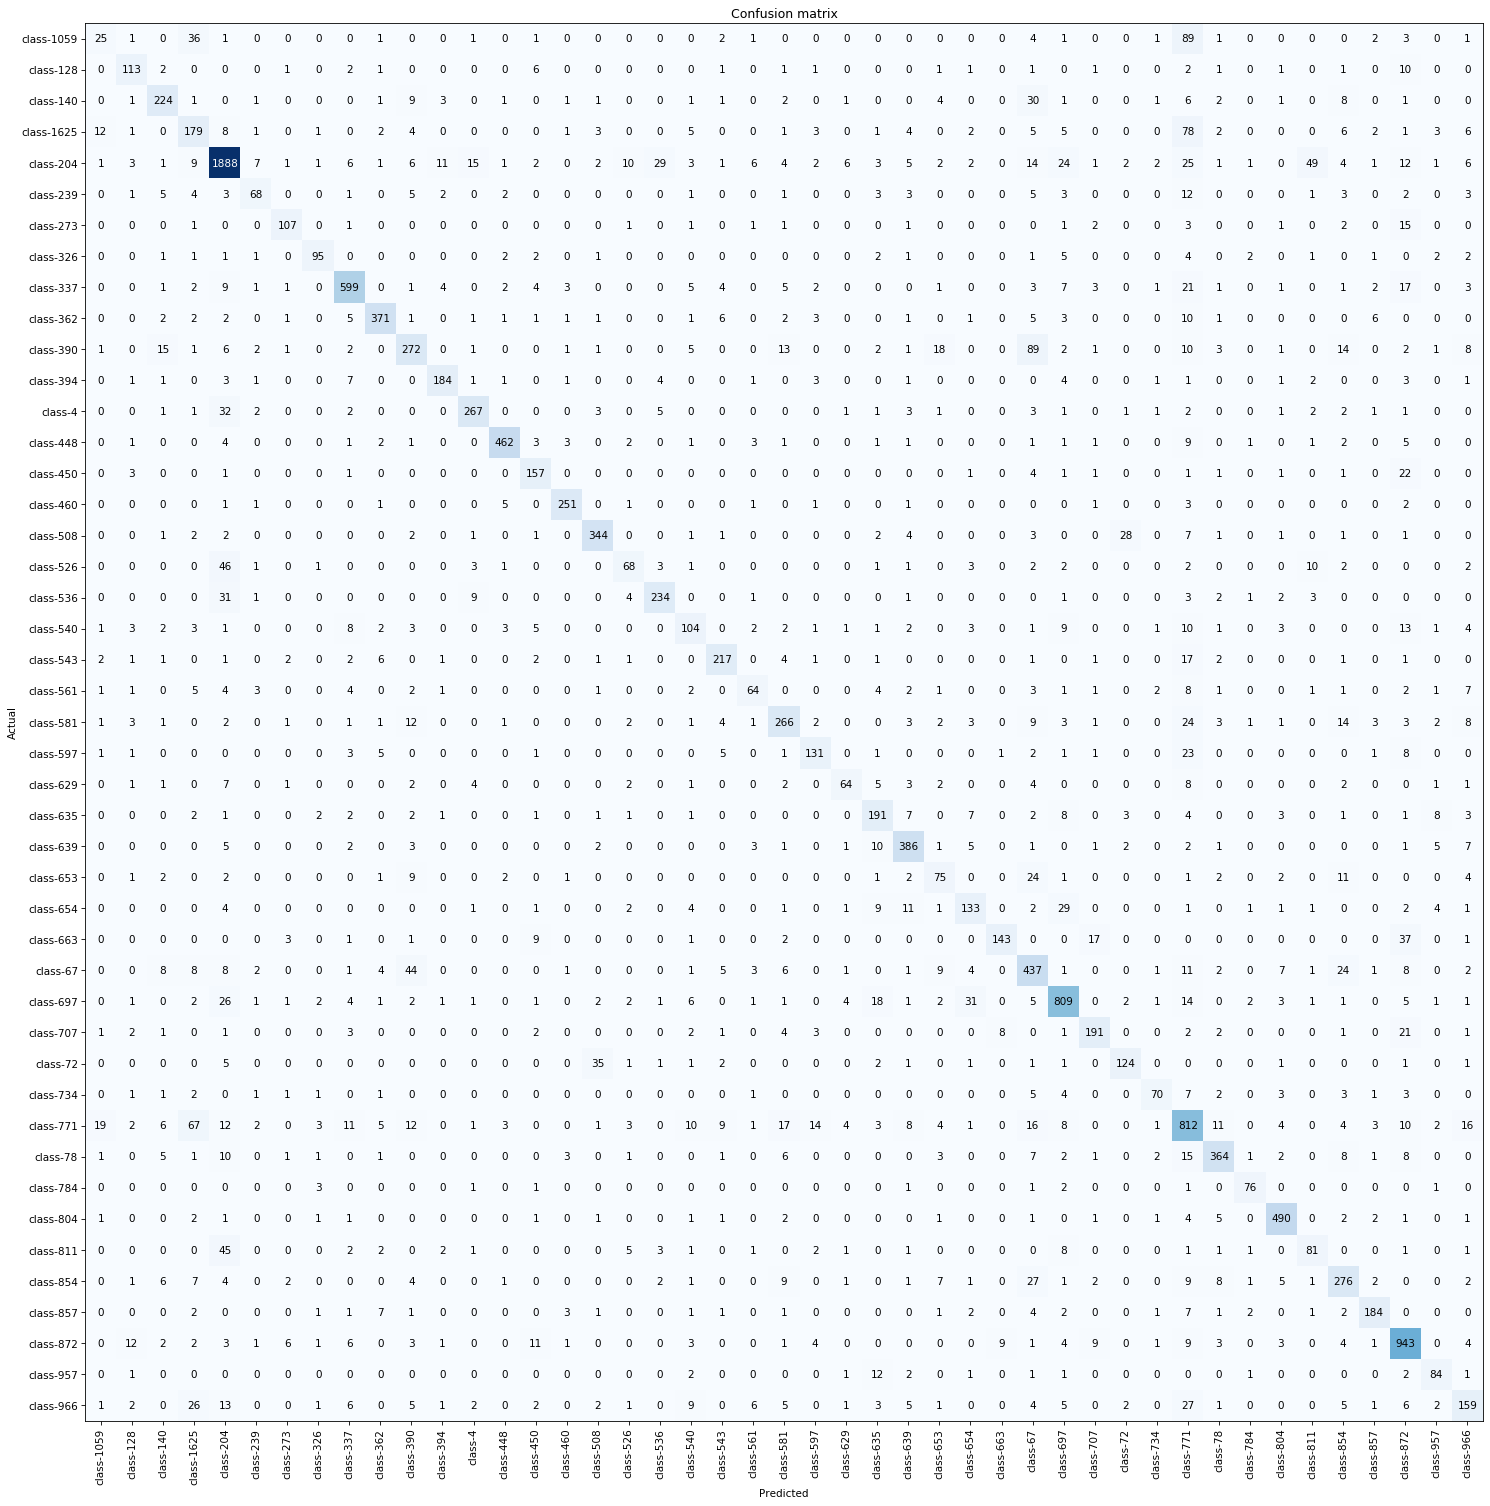

In [23]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=75)


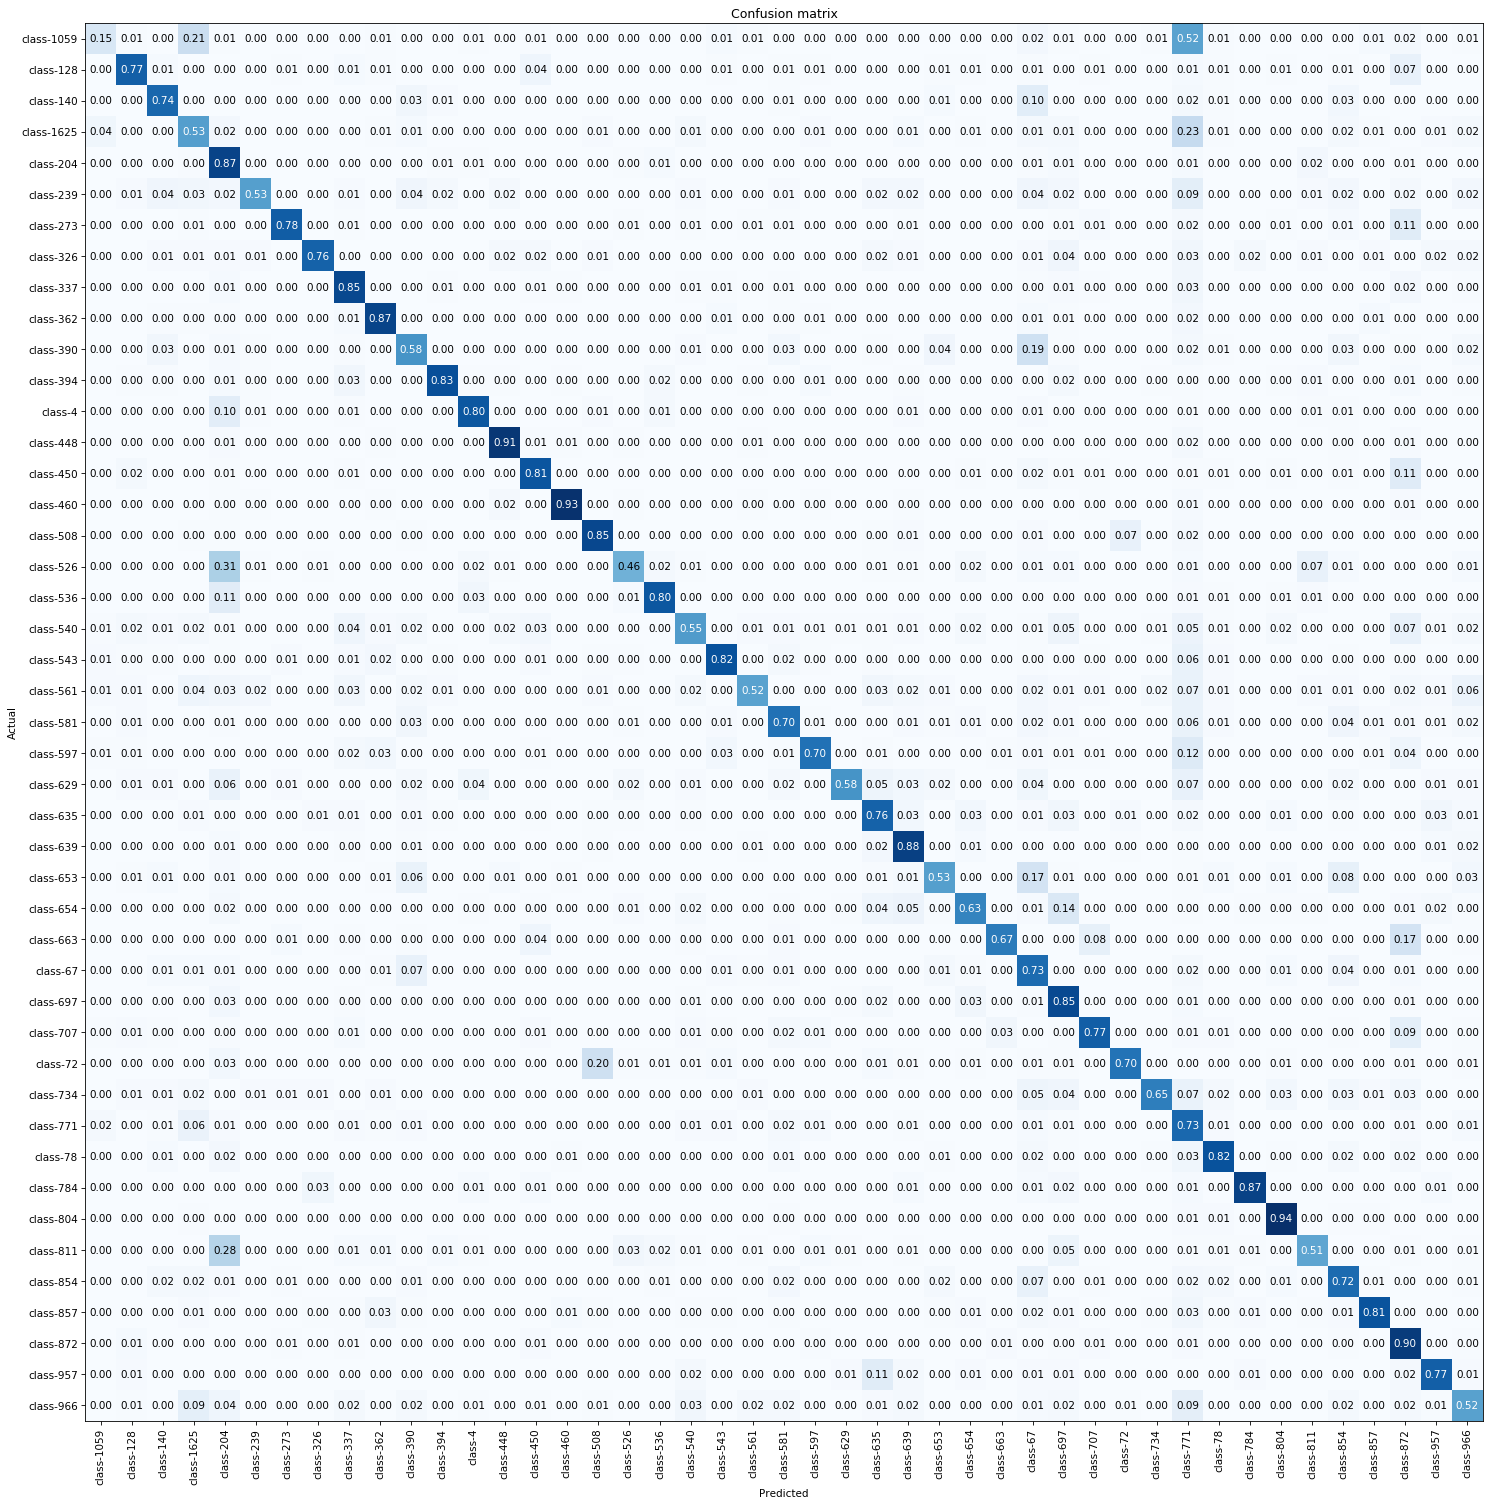

In [24]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=75,normalize=True)


In [25]:
data.classes

['class-1059',
 'class-128',
 'class-140',
 'class-1625',
 'class-204',
 'class-239',
 'class-273',
 'class-326',
 'class-337',
 'class-362',
 'class-390',
 'class-394',
 'class-4',
 'class-448',
 'class-450',
 'class-460',
 'class-508',
 'class-526',
 'class-536',
 'class-540',
 'class-543',
 'class-561',
 'class-581',
 'class-597',
 'class-629',
 'class-635',
 'class-639',
 'class-653',
 'class-654',
 'class-663',
 'class-67',
 'class-697',
 'class-707',
 'class-72',
 'class-734',
 'class-771',
 'class-78',
 'class-784',
 'class-804',
 'class-811',
 'class-854',
 'class-857',
 'class-872',
 'class-957',
 'class-966']

In [29]:
i=0
for c in data.classes:
    if c == 'class-653':
        print(i)
        break
    i += 1

27


In [30]:
data.classes[27]

'class-653'